In [8]:
import helper
from matplotlib import pyplot as plt
from matplotlib import animation

from glob import glob
import os

import inspect

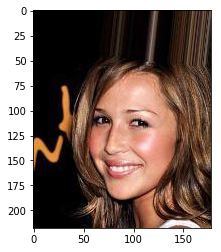

In [9]:
im_dir = glob(os.path.join('.', 'img_align_celeba', '*.jpg'))[42]
image = helper.get_image(im_dir, 'RGB')
plt.imshow(image)

celeba_preprocessing accepts following kwargs:
    - width (mandatory)
    - height (mandatory)
    - face_size (default 108)
    - delta_j (default to 0)
    - delta_i (default to 0; both to adjust face position)
    - rotation (default to 0; IN DEGREES)

In [3]:
print(inspect.getsource(helper.celeba_preprocessing))

def celeba_preprocessing(image, width, height, **kwargs):
    # Remove most pixels that aren't part of a face
    # taken from medium.com
    face_width = face_height = kwargs.get('face_size', 108)
    j = (image.size[0] - face_width) // 2 + kwargs.get('delta_j', 0)
    i = (image.size[1] - face_height) // 2 + kwargs.get('delta_i', 0)
    return image.rotate(kwargs.get('rotation', 0)).crop([j, i, j + face_width, i + face_height]).resize([width, height], Image.BILINEAR)



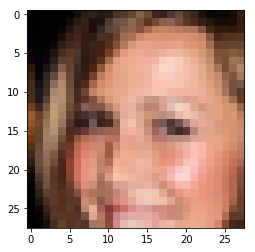

In [4]:
im_dir = glob(os.path.join('.', 'img_align_celeba', '*.jpg'))[42]
image = helper.get_image(im_dir, 'RGB', helper.celeba_preprocessing, width=28, height=28)
plt.imshow(image)

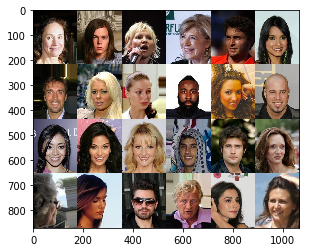

In [5]:
im_dirs = glob(os.path.join('.', 'img_align_celeba', '*.jpg'))[:24]
images = [helper.get_image(im_dir, 'RGB') for im_dir in im_dirs]
plt.imshow(helper.images_grid_for_plot(images, 'RGB', 6, 4))

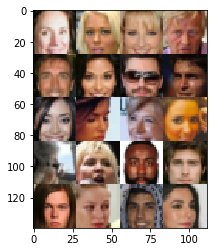

In [6]:
im_dirs = glob(os.path.join('.', 'img_align_celeba', '*.jpg'))[:20]
images = [helper.get_image(im_dir, 'RGB', helper.celeba_preprocessing, width=28, height=28) for im_dir in im_dirs]
plt.imshow(helper.images_grid_for_plot(images, 'RGB', 4, 5))

ValueError: Invalid file object: <_io.BufferedReader name=55>

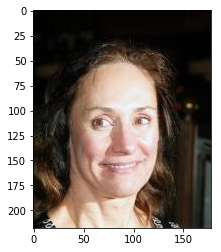

In [7]:
from IPython.display import HTML
fig = plt.figure()
images = [[plt.imshow(helper.get_image(im_dir, 'RGB'), animated=True)] for im_dir in glob(os.path.join('.', 'img_align_celeba', '*.jpg'))[:20]]
ani = animation.ArtistAnimation(fig, images, interval=500, blit=True, repeat_delay=1000)
ani.save('test.mp4')
HTML('test.mp4')

In [ ]:
images_dataset = helper.ImagesDataset(glob(os.path.join('.', 'img_align_celeba', '*.jpg')), 'RGB', helper.celeba_preprocessing, width=28, height=28)

In [ ]:
plt.imshow(helper.images_grid_for_plot(images_dataset.get_random_batch(27), 'RGB', 3, 9))
#batch is normalized by /255 - 0.5